# TP_Clustering

##### Imports

In [14]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from matplotlib import cm
warnings.filterwarnings('ignore')

##### Chargement des données

In [15]:
datas = pd.read_csv('./flickr_data.csv', sep=',', error_bad_lines=False)
X = datas.values
datas.head(4)

b'Skipping line 1555: expected 16 fields, saw 17\nSkipping line 3691: expected 16 fields, saw 17\n'
b'Skipping line 74107: expected 16 fields, saw 18\nSkipping line 74108: expected 16 fields, saw 18\nSkipping line 75320: expected 16 fields, saw 17\nSkipping line 75323: expected 16 fields, saw 17\nSkipping line 78506: expected 16 fields, saw 17\nSkipping line 78516: expected 16 fields, saw 17\nSkipping line 78517: expected 16 fields, saw 17\nSkipping line 78518: expected 16 fields, saw 17\nSkipping line 78519: expected 16 fields, saw 17\nSkipping line 78520: expected 16 fields, saw 17\nSkipping line 80008: expected 16 fields, saw 17\nSkipping line 81821: expected 16 fields, saw 17\n'


,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year
0,22653655033,77161041@N00,45.768121,4.801776,"square,sierra,squareformat,iphoneography,insta...",Enfin. #instabeer #beer #chimay #apero,46,18,24,11,2015,46,18,24,11,2015
1,22884818287,113280318@N03,45.759700,4.842200,"square,squareformat,iphoneography,instagramapp...",https://www.facebook.com/PascalFrontiPhotograp...,3,17,24,11,2015,3,17,24,11,2015
2,23277598065,132999708@N08,46.027633,4.699855,NaN,compagnons_dev_arnas20 (1),0,15,7,11,2015,50,15,24,11,2015
3,22883485267,132999708@N08,46.027572,4.699966,NaN,compagnons_dev_arnas20 (3),1,15,7,11,2015,50,15,24,11,2015


### Prétraitements

In [17]:
print(datas.shape)
datas = datas.drop_duplicates()
print(datas.shape)
datas_numpy = datas.values
tags = datas[" tags"]
X=[]

for index in range(0,len(tags)):
    #print(index)
    try :
        line = str(tags[index]).split(",")
    except KeyError: 
        continue
    else :
        if "lyon" in line:
            X.append(datas_numpy[index])
X = np.array(X)
datas = pd.DataFrame(data=X, columns=datas.columns)

(1756, 16)
(1756, 16)


In [20]:
datas.columns = datas.columns.str.replace(' ','')

In [21]:
BBox = ((datas.long.min(), datas.long.max(), datas.lat.min(), datas.lat.max()))
print(BBox)

(4.617562, 5.075758, 45.584872, 45.90895)


#### La Visualisation

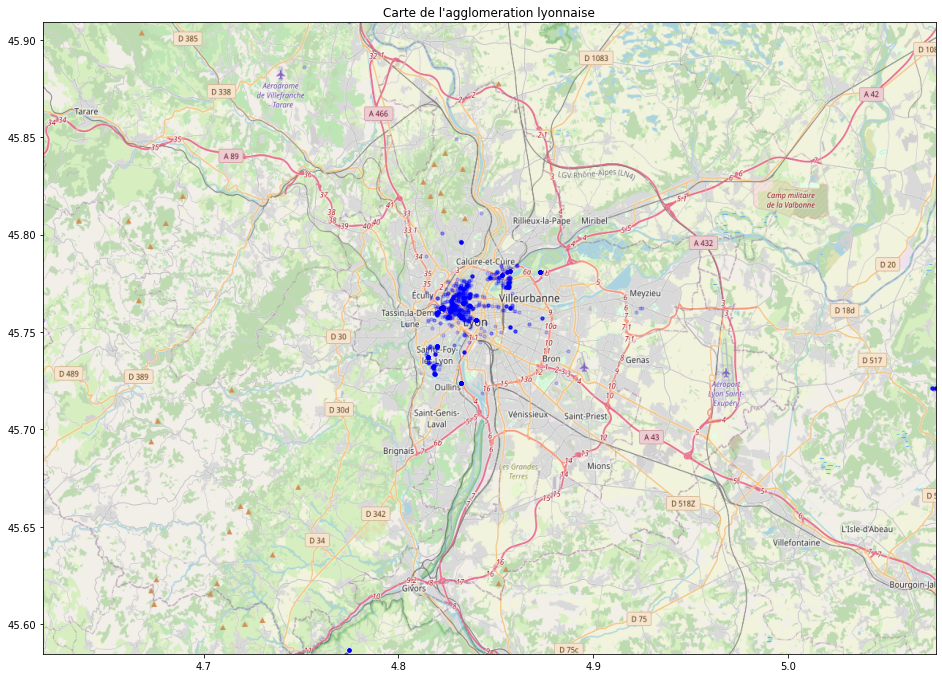

In [23]:
carte = plt.imread('./map.png')
fig, ax = plt.subplots(figsize = (16,14))
ax.scatter(datas.long, datas.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Carte de l\'agglomeration lyonnaise')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(carte, zorder=0, extent = BBox, aspect= 'equal')

#### Le clustering

> On ne peut pas utiliser les K-Means, on ne connait pas le nombre de clusters. On va utiliser un algorithme qui se base sur la densité : DBSCAN.

In [24]:
dbscan = DBSCAN(eps=0.0001, min_samples=10)
lat = datas.iloc[:,2:3].values
long = datas.iloc[:,3:4].values
locations = datas.iloc[:,2:4].values
print(locations.shape)
clustering = dbscan.fit(locations)
print(clustering.labels_)

(1582, 2)
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0  0  0  0 -1 -1 -1 -1 -1 -1  0  0  0  0 -1  0  0  0  0 -1 -1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  2 -1 -1 -1 -1 -1 -1 -1 -1  3  3  3  3  3 -1  3 -1 -1  4 -1 -1 -1 -1
 -1 -1 -1 -1  5  5  5 -1  3  3  3 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  5  5  5  5  5  5  5  5  5 -1 -1 -1 -1 -1 -1 -1  6  6  6  6  6  6  6  6
  6  6  6  4  4  4 -1 -1 -1  5  5  5  5  5  5  5  5  5  4  4  4 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  5  5  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  7  7  7  7  7  7  7  7
  7  7  7  7 -1  7  7  7  7  7  7  7  7  

#### Visualisation du clustering

In [25]:
print(long.shape)
print(lat.shape)
print(clustering.labels_.shape)

ResultDict = {}
ResultDictLong = {}
ResultDictLat = {}
for index in range(0,len(clustering.labels_)):
    if not clustering.labels_[index] in ResultDict:
        ResultDict[clustering.labels_[index]] = []
        ResultDictLong[clustering.labels_[index]] = []
        ResultDictLat[clustering.labels_[index]] = []
    ResultDict[clustering.labels_[index]].append(np.array([long[index][0],lat[index][0]]))
    ResultDictLong[clustering.labels_[index]].append(long[index][0])
    ResultDictLat[clustering.labels_[index]].append(lat[index][0])
print(ResultDictLat[0])
print(ResultDict.keys())
print(ResultDictLong.keys())
print(ResultDictLat.keys())
print(ResultDict)

(1582, 1)
(1582, 1)
(1582,)
[45.79618, 45.79618, 45.79618, 45.79618, 45.79618, 45.79618, 45.79618, 45.79618, 45.79618, 45.79618, 45.79618, 45.79618]
dict_keys([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
dict_keys([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
dict_keys([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
{-1: [array([ 4.849875, 45.763429]), array([ 4.814243, 45.739289]), array([ 4.833426, 45.76768 ]), array([ 4.82865 , 45.766411]), array([ 4.830411, 45.76613 ]), array([ 4.826677, 45.757019]), array([ 4.833261, 45.757411]), array([ 4.825838, 45.758544]), array([ 4.823827, 45.758241]), array([ 4.823333, 45.758113]), array([ 4.822825, 45.761963]), array([ 4.821797, 45.762227]), array([ 4.826811, 45.762966]), array([ 4.826908, 45.762947]), array([ 4.853981, 45.761353]), array([ 4.833576, 45.764738]), array([ 4.835293, 45.773622]), array([ 4.83

In [26]:
colors = cm.rainbow(np.linspace(0, 1, len(ResultDict.keys())))

colorsDict = {}
index = 0
for key in ResultDict:
    colorsDict[key] = colors[index]
    index +=1

print(colors)
print(colorsDict)

[[0.5        0.         1.         1.        ]
 [0.42156863 0.12288829 0.99810333 1.        ]
 [0.33529412 0.25584278 0.9916447  1.        ]
 [0.24901961 0.38410575 0.98063477 1.        ]
 [0.17058824 0.49465584 0.9667184  1.        ]
 [0.08431373 0.60753895 0.94717736 1.        ]
 [0.00196078 0.70928131 0.92328911 1.        ]
 [0.08039216 0.79053241 0.89789203 1.        ]
 [0.16666667 0.8660254  0.8660254  1.        ]
 [0.25294118 0.92563766 0.83018403 1.        ]
 [0.33137255 0.96512409 0.79428989 1.        ]
 [0.41764706 0.9916447  0.75133189 1.        ]
 [0.50392157 0.99998103 0.70492555 1.        ]
 [0.58235294 0.9916447  0.65992453 1.        ]
 [0.66862745 0.96512409 0.60753895 1.        ]
 [0.75490196 0.92090552 0.55236497 1.        ]
 [0.83333333 0.8660254  0.5        1.        ]
 [0.91960784 0.79053241 0.44021574 1.        ]
 [1.         0.70054304 0.37841105 1.        ]
 [1.         0.60753895 0.32071024 1.        ]
 [1.         0.49465584 0.25584278 1.        ]
 [1.         

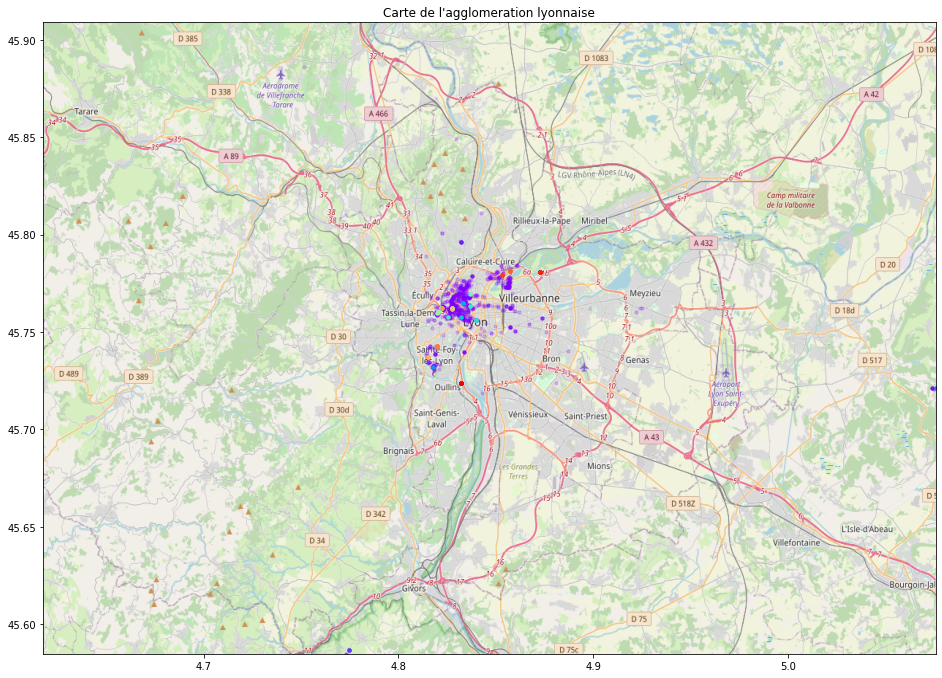

In [27]:

carte = plt.imread('./map.png')
fig, ax = plt.subplots(figsize = (16,14))
for key in ResultDict:
    ax.scatter(ResultDictLong[key], ResultDictLat[key], zorder=1, alpha= 0.2, color=colorsDict[key], s=10)
ax.set_title('Carte de l\'agglomeration lyonnaise')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(carte, zorder=0, extent = BBox, aspect= 'equal')